In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

In [55]:
data1 = pd.read_csv('./data/3/log.txt', usecols= ['timestamp', 'mspt'], sep='\t', header=0)
data2 = pd.read_csv('./data/4/log.txt', usecols= ['timestamp', 'mspt'], sep='\t', header=0)

ys1 = pd.read_csv('./data/3/yardstick-metrics.log', sep='\t')
ys2 = pd.read_csv('./data/4/yardstick-metrics.log', sep='\t')

data1_ = data1[data1['timestamp'] // 1000 >= ys1.iat[0, 0] // 1000]
data1_.index = np.arange(1, len(data1_) + 1)
data1_ = data1_.drop(columns=['timestamp'])

data2_ = data2[data2['timestamp'] // 1000 >= ys2.iat[0, 0] // 1000]
data2_.index = np.arange(1, len(data2_) + 1)
data2_ = data2_.drop(columns=['timestamp'])

<AxesSubplot: >

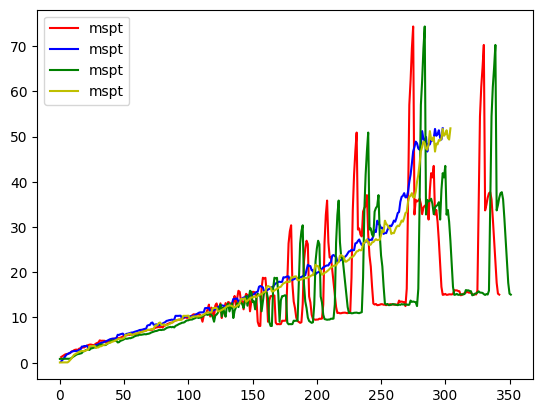

In [58]:
sns.lineplot(data1_, palette=['r'])
sns.lineplot(data2_, palette=['b'])

# original plot:
# sns.lineplot(data1.drop(columns=['timestamp']), palette=['g'])
# sns.lineplot(data2.drop(columns=['timestamp']), palette=['y'])